# Data Preprocessing

Importing the libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [61]:
#獲取當前路徑
import os
os.chdir('/Users/shiliu/Downloads')
os.getcwd()

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [62]:
X = dataset.iloc[:, 1:2].values
# take all the lines
# take all the Level column
# 1:2 means let X become a matrix
y = dataset.iloc[:, 2].values
# take all the lines
# take the Salary column
# vector

Split the dataset into a training set and a test set

In [63]:
####### No need in this model, because the dataset is small
#from sklearn.cross_validation import train_test_split
#X_train, X_ test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# test_size = 0.2 = 20%

Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Fitting SVR Model to the dataset

Create your regressor here

In [65]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result with SVR

In [66]:
y_pred = sc_y.inverse_transform
(regressor.predict(sc_X.transform(np.array([[6.5]]))))


array([130001.82883924])

# Visualising the SVR results

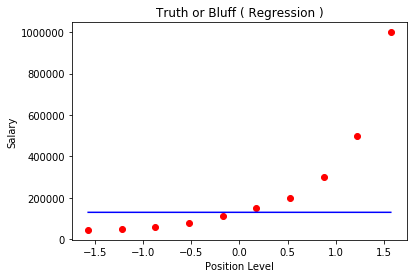

In [67]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff ( Regression )')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()